## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [1]:
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()

In [3]:
x, y = dataset['data'], dataset['target']

In [4]:
x_rm = x[:, 5]

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
def draw_rm_price():
    plt.scatter(x_rm,y)

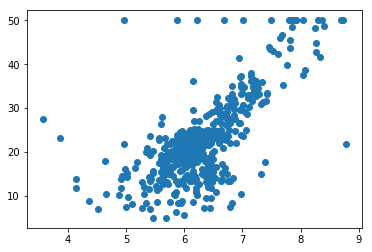

In [8]:
draw_rm_price()

$$y = k*x + b$$

$$ loss = \frac{1}{n} \sum{(y_i - {y_1i})^2}$$

In [9]:
def loss_var(y, y_get):
    return np.mean(np.square(y - y_get))

$$ loss = \frac{1}{n} \sum{|y_i- y_{1i}|} $$

In [10]:
def loss_avrange_var(y, y_get):
    return np.mean(np.abs(y - y_get))

### Random Choose Method to get k and b 

In [11]:
trying_time = 1000
min_loss = float('inf')
best_k = None
best_b = None

for i in range(trying_time):
    k = random.random()*200 - 100
    b = random.random()*200 - 100
    price_by_random_k_b = [k*i + b for i in x_rm]
    
    current_loss = loss_var(y, np.array(price_by_random_k_b))
    if current_loss < min_loss:
        best_k = k 
        best_b = b
        print('when time is :{}, k = {}, b = {}, loss = {}'.format(i, k ,b , current_loss))
        min_loss = current_loss
        

when time is :0, k = 40.66902222812786, b = -74.21217039410017, loss = 25766.27752019726
when time is :2, k = 4.269273678479664, b = -3.2189498869743716, loss = 56.27247525797353
when time is :972, k = 11.255324367173074, b = -47.11687023364372, loss = 47.06407917654868


In [12]:
price_by_random_k_b = [3.3*i + 1.3 for i in x_rm]
current_loss = loss_var(y, np.array(price_by_random_k_b))
current_loss

60.43042934749012

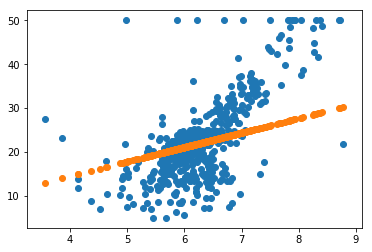

In [13]:
best_k = 3.3
best_b = 1.3
draw_rm_price()
plt.scatter(x_rm, [[best_k*i + best_b for i in x_rm]])

### Supervised Direction to get k and b

In [14]:
trying_time = 1000
min_loss = float('inf')
best_k = None
best_b = None
k = random.random()*200 - 100
b = random.random()*200 - 100
direction = [[1, 1], [1, -1], [-1, 1], [-1, -1]]
current_direction = random.choice(direction)

for i in range(trying_time):
    k += current_direction[0]
    b += current_direction[1]
    
    price_by_random_k_b = [k*i + b for i in x_rm]
    
    current_loss = loss_var(y, np.array(price_by_random_k_b))
    if current_loss < min_loss:
        best_k = k 
        best_b = b
        print('when time is :{}, k = {}, b = {}, loss = {}'.format(i, k ,b , current_loss))
        min_loss = current_loss
        
    else:
        current_direction  = random.choice([i for i in direction if i!=current_direction])

when time is :0, k = 9.085535794559732, b = -46.49134053109454, loss = 185.80335884616298
when time is :1, k = 10.085535794559732, b = -45.49134053109454, loss = 65.60889508774868
when time is :2, k = 11.085535794559732, b = -44.49134053109454, loss = 52.531618076369895
when time is :232, k = 9.085535794559732, b = -36.49134053109454, loss = 47.30583538216993
when time is :236, k = 9.085535794559732, b = -34.49134053109454, loss = 43.606330689371326


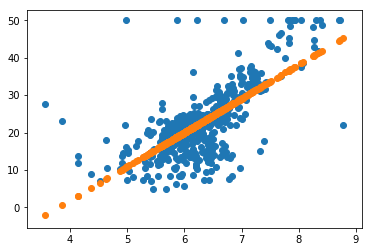

In [15]:
draw_rm_price()
plt.scatter(x_rm, [[best_k*i + best_b for i in x_rm]])

### Gradient Descent Method to get k and b

$$ loss(\theta) = \frac{1}{2n}\sum_{i = 0} ^n(h_\theta (x^i) - y^i)^2$$
½是一个常量，这样是为了在求梯度的时候，二次方乘下来就和这里的½抵消了，自然就没有多余的常数系数，方便后续的计算，同时对结果不会有影响


$$可以看到变量有2个,即 \theta_0 和 \theta_1  分别对应之前的k 和 b$$
$$h_\theta (x^i) = \theta_0* x^i + \theta_1$$

$$ \frac{\partial h(\theta)}{\partial\theta_1}=\frac1n\sum_{i=0}^n(h_\theta(x^i) - y^i)$$
$$ \frac{\partial h(\theta)}{\partial\theta_0}=\frac1n\sum_{i=0}^n(h_\theta(x^i) - y^i)x^i$$

$$梯度下降公式: \Theta^n = \Theta^{n-1} - \alpha \nabla loss $$

In [16]:
def loss_var_new(theta, x, y):
    #theta为传入的含k，b 的矩阵
    diff = np.dot(x, theta) - y  #h(x)  - y 的值
    return np.mean(np.square(diff))/2

In [17]:
def gradient_function(theta, x, y):
    #theta为传入的含k，b 的矩阵
    diff = np.dot(x, theta) - y  #h(x)  - y 的值
    return  (1.0/y.shape[0]) * np.dot(np.transpose(x), diff)

In [18]:
#格式化输入参数，调整矩阵，方便矩阵运算
num = x_rm.shape[0] 
X0 = np.ones((num, 1))
X = np.hstack((x_rm.reshape(num, 1), X0)) #增加一个维度，方便矩阵运算
Y = y.reshape(y.shape[0], 1)
alpha = 0.04


def gradient_descent(X, Y, alpha):
    theta = np.array([1, 1]).reshape(2, 1) #初始k b值[[1],[1]]
    gradient = gradient_function(theta, X, Y)
    while not np.all(np.abs(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = gradient_function(theta, X, Y)
        #print(theta)
    return theta

In [19]:
theta = gradient_descent(X,Y,alpha)

In [20]:
theta

array([[  9.10197825],
       [-34.66978915]])

In [21]:
loss_var_new(theta, X, Y)

21.800275889845267

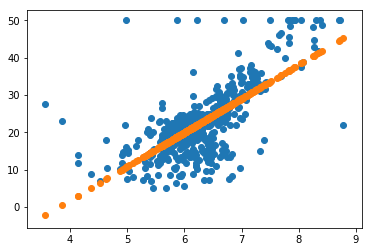

In [22]:
best_k, best_b = theta[0][0], theta[1][0]
draw_rm_price()
plt.scatter(x_rm, [[best_k*i + best_b for i in x_rm]])

#### Least squares Method to get k and b

$$ \varepsilon = \sum_{i = 0} ^n (ax_i+b-y_i)^2 $$
$$ \frac{d}{da}\varepsilon = 2\sum(ax_i+b-y_i)x_i=0$$
$$ \frac{d}{db}\varepsilon = 2\sum(ax_i+b-y_i)=0$$
上述方程式二元一次方程组,求解即可得出 a,b的值

将上述方程组化成以下形式：
$$a*k_{11}+ b*k_{12} - k_{13}= 0$$
$$a*k_{21}+ b*k_{22} - k_{23}= 0$$
$$k_{11}= \sum x_i^2 \quad k_{12}= \sum x_i  \quad k_{13}= \sum{x_i y_i}$$
$$k_{21}= \sum x_i\quad k_{22}= \sum 1  \quad   k_{23}= \sum y_i$$

In [23]:
import sympy 
def least_square(x, y):
    
    k11 = np.sum(np.square(x))
    k12 = np.sum(x)
    k13 = np.sum(x*y)
    k21 = np.sum(x)
    k22 = x.shape[0]*1
    k23 = np.sum(y)
    
    a,b= sympy.symbols("a b")   # 申明未知数"a"和"b"
    result = sympy.solve([a*k11 + b*k12 - k13,a*k21 + b*k22 - k23],[a,b]) 
    return result[a],result[b]

In [24]:
test_x = np.array([25,27,31,33,35])
test_y = np.array([110,115,155,160,180])

In [25]:
result =least_square(test_x, test_y)
result

(310/43, -3170/43)

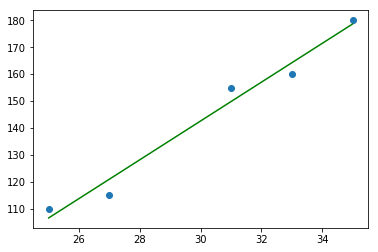

In [26]:
best_k, best_b = float(result[0]), float(result[1])
plt.scatter(test_x, test_y)
plt.plot(test_x, [best_k*i + best_b for i in test_x], color = 'g')

In [27]:
result =least_square(x_rm, y)
result

(9.10210898118031, -34.6706207764386)

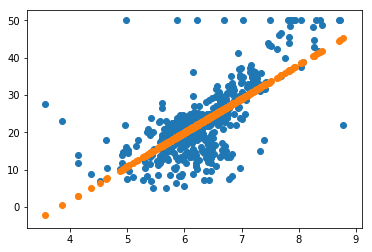

In [28]:
best_k, best_b = float(result[0]), float(result[1])
draw_rm_price()
plt.scatter(x_rm, [best_k*i + best_b for i in x_rm])

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 一个固定的公式难以随着情况的改变而做出相应变化；这样符合要求的式子很难被设计出来

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:获得好的参数所花费的时间太长，因为都是随机的

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:方法理论上来说2优于方法1；方法2的缺点是找到对的方向花费的平均时间较长，尤其受到初始值的影响，有时候效果还不如方法1

###### 4. Why do we use `Derivative / Gradient` to fit a target function? 

Ans:可以更快更准确得找到合适的K和B值

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度是函数在该点处的方向导数沿着该方向取得最大值,该最大值就是当前点的梯度，下降指沿着该方向函数值下降的最快

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:方法3的优点在于目标性强，不断迭代参数使得达到预期效果值,并且可以控制步长，设定最大loss值

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:根据变化调整自身以达目的

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



### Search Problem Answer 

#### Get data from web

In [29]:
from urllib import request
import urllib
import re

In [30]:
def get_location1(name):
    #百度地图api调用，获取地铁站经纬度
    city  = urllib.parse.quote('上海')
    my_ak = '02maPGXipeuzo92LTipwcAcH24pByq62'
    tag = urllib.parse.quote('地铁站')
    qurey = urllib.parse.quote(name)
    try:
        url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+tag+'&region='+city+'&output=json&ak='+my_ak
        req = request.urlopen(url)
        res = req.read().decode('utf-8')
        print(res)
        lat = re.findall('"lat":(.*)',res)[0].split(',')[0]
        lng = re.findall('"lng":(.*)',res)[0]
        return lat,lng
    except:
        return 0,0

In [31]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [32]:
get_location1('莘庄站')

{
    "status":0,
    "message":"ok",
    "results":[
        {
            "name":"莘庄",
            "location":{
                "lat":31.116917,
                "lng":121.392129
            },
            "address":"地铁1号线;地铁5号线",
            "province":"上海市",
            "city":"上海市",
            "area":"闵行区",
            "detail":1,
            "uid":"480c789657a7fe38f32d832a"
        },
        {
            "name":"莘庄",
            "location":{
                "lat":31.11525,
                "lng":121.384781
            },
            "address":"91路;125路;150路;153路;166路;189路;196路;700路;704路b线;708路;712路;747路;816路;831路;scip短驳2线;虹桥枢纽4路;虹桥枢纽5路;南江线;松莘线;松莘线b线;徐闵线;徐闵夜宵专线;莘团线;莘团线区间;莘庄1路;莘庄2路;闵行1路;闵行20路;闵行31路",
            "province":"上海市",
            "city":"上海市",
            "area":"闵行区",
            "detail":0,
            "uid":"9d71aab82e011e2d6f3e1b0d"
        },
        {
            "name":"莘庄地铁站",
            "location":{
                "lat":31.116616,
                "lng":121.3

('31.116917', '121.392129')

In [33]:
get_location1('环城东路站')

{"status":401,"message":"当前并发量已经超过约定并发配额，限制访问"}


(0, 0)

In [34]:
import urllib.request
import urllib.parse
import re
from bs4 import BeautifulSoup as bs

In [35]:
url = 'http://service.shmetro.com/yxxlt/index.htm'

In [36]:
req = urllib.request.Request(url)
req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0')
response = urllib.request.urlopen(req, timeout=10)
html = response.read().decode('utf-8')
response.close()

In [39]:
def url_open(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0')
    response = urllib.request.urlopen(req, timeout=10)
    html = response.read().decode('utf-8')
    response.close()
    return html

In [40]:
url = 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin'

In [41]:
def get_subway_line_url(html):
    #获取所有地铁具体url, 以list返回
    #beautifulsoup + 正则
    soup = bs(html)
    table = soup.find_all('table')[1]
    table = str(table)
    url_list = re.findall('<a data-lemmaid="\w*?" href="(.*?)" target="_blank">(\w*?)</a>', table)
    for i, item in enumerate(url_list):
        url_list[i] = list(item)
    for item in url_list:
        item[0] = 'https://baike.baidu.com' + item[0]
    return url_list

In [42]:
html = url_open(url)

In [43]:
get_subway_line_url(html)[3]

['https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF/6310090',
 '上海地铁4号线']

In [45]:
def get_station(html):
    soup = bs(html)
    table = soup.find_all('table')[0]
    station_list = []
    for item in table.find_all('tr'):
        station = re.findall('href=".*?" target="_blank">(\w*)?</a>', str(item.td))
        if not station:
            station = re.findall('href=".*?" target="_blank"><b>(\w*)?</b></a>', str(item.td))        
        if not station:
            station = re.findall('valign="middle">(\w*?)</td>', str(item.td))          
        if station:
            if station[0].endswith('站'):
                station_list.append(station[0])
    return station_list

In [46]:
def get_all_line(url):
    #获取所有地铁站点信息
    html = url_open(url)
    sub_line_url = get_subway_line_url(html)
    subway_inf = []
    for subway in sub_line_url:
        html = url_open(subway[0])
        station = get_station(html)
        if subway[1] == '上海地铁17号线':
            if station[0] == '虹桥火车站':
                station[0] = '虹桥火车站站'  
        subway_inf.append({subway[1]: station})
        
    return subway_inf

In [47]:
url = 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin'

In [48]:
html = url_open(url)

In [49]:
sub_line_url = get_subway_line_url(html)

In [50]:
url = sub_line_url[14][0] #17号线

In [51]:
html = url_open(url)

In [52]:
soup = bs(html)
table = soup.find_all('table')[0]


In [53]:
for item in table.find_all('tr'):
    station = re.findall('href=".*?" target="_blank">(\w*)?</a>', str(item.td))
    if not station:
        station = re.findall('href=".*?" target="_blank"><b>(\w*)?</b></a>', str(item.td))
    if not station:
        station = re.findall('valign="middle">(\w*?)</td>', str(item.td))  
    print(station)

[]
['虹桥火车站']
['诸光路站']
['蟠龙路站']
['徐盈路站']
['徐泾北城站']
['嘉松中路站']
['赵巷站']
['汇金路站']
['青浦新城站']
['漕盈路站']
['淀山湖大道站']
['朱家角站']
['东方绿舟站']
[]


In [54]:
#html = url_open('https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/22947836')

In [55]:
get_station(html)

['虹桥火车站',
 '诸光路站',
 '蟠龙路站',
 '徐盈路站',
 '徐泾北城站',
 '嘉松中路站',
 '赵巷站',
 '汇金路站',
 '青浦新城站',
 '漕盈路站',
 '淀山湖大道站',
 '朱家角站',
 '东方绿舟站']

In [56]:
url = 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin'

In [57]:
subway_inf_origin = get_all_line(url)

In [58]:
subway_inf = subway_inf_origin.copy()

In [59]:
subway_inf[9]['上海地铁10号线'] = subway_inf[9]['上海地铁10号线'][:3]+ ['龙溪路站']+ subway_inf[9]['上海地铁10号线'][3:]

In [60]:
subway_inf[9]['上海地铁10号线'] = list(reversed(subway_inf[9]['上海地铁10号线']))
subway_inf[9]['上海地铁10号线']

['新江湾城站',
 '殷高东路站',
 '三门路站',
 '江湾体育场站',
 '五角场站',
 '国权路站',
 '同济大学站',
 '四平路站',
 '邮电新村站',
 '海伦路站',
 '四川北路站',
 '天潼路站',
 '南京东路站',
 '豫园站',
 '老西门站',
 '新天地站',
 '陕西南路站',
 '上海图书馆站',
 '交通大学站',
 '虹桥路站',
 '宋园路站',
 '伊犁路站',
 '水城路站',
 '龙溪路站',
 '上海动物园站',
 '虹桥1号航站楼站',
 '虹桥2号航站楼站',
 '虹桥火车站站',
 '龙溪路站',
 '龙柏新村站',
 '紫藤路站',
 '航中路站']

In [61]:
subway_inf[14]

{'上海地铁17号线': ['虹桥火车站站',
  '诸光路站',
  '蟠龙路站',
  '徐盈路站',
  '徐泾北城站',
  '嘉松中路站',
  '赵巷站',
  '汇金路站',
  '青浦新城站',
  '漕盈路站',
  '淀山湖大道站',
  '朱家角站',
  '东方绿舟站']}

#### Create net infomation

In [62]:
from collections import defaultdict
from collections import Counter

In [63]:
def create_subway_connection(stations):   
    station_connect = defaultdict(list)
    station_count = Counter(stations)
    change_point = station_count.most_common(1)[0][0] #获取地铁分支点  
    length = len(stations)
    pre_station = None
    appear_time = 0
    for i, station in enumerate(stations):
        if i< length-1 and (stations[i+1]!= change_point or (stations[i+1]==change_point and appear_time==0)):
            next_station = stations[i+1]
        else:
            next_station = None
        if station == change_point:
            appear_time +=1
            if appear_time ==2: #change_point appear 2 times
                pre_station = None

        if pre_station != None:
            station_connect[station].append(pre_station)
        if next_station !=None:
            station_connect[station].append(next_station)
        pre_station = station   
    return station_connect

In [64]:
create_subway_connection(subway_inf[0]['上海地铁1号线'])

defaultdict(list,
            {'莘庄站': ['外环路站'],
             '外环路站': ['莘庄站', '莲花路站'],
             '莲花路站': ['外环路站', '锦江乐园站'],
             '锦江乐园站': ['莲花路站', '上海南站站'],
             '上海南站站': ['锦江乐园站', '漕宝路站'],
             '漕宝路站': ['上海南站站', '上海体育馆站'],
             '上海体育馆站': ['漕宝路站', '徐家汇站'],
             '徐家汇站': ['上海体育馆站', '衡山路站'],
             '衡山路站': ['徐家汇站', '常熟路站'],
             '常熟路站': ['衡山路站', '陕西南路站'],
             '陕西南路站': ['常熟路站', '黄陂南路站'],
             '黄陂南路站': ['陕西南路站', '人民广场站'],
             '人民广场站': ['黄陂南路站', '新闸路站'],
             '新闸路站': ['人民广场站', '汉中路站'],
             '汉中路站': ['新闸路站', '上海火车站站'],
             '上海火车站站': ['汉中路站', '中山北路站'],
             '中山北路站': ['上海火车站站', '延长路站'],
             '延长路站': ['中山北路站', '上海马戏城站'],
             '上海马戏城站': ['延长路站', '汶水路站'],
             '汶水路站': ['上海马戏城站', '彭浦新村站'],
             '彭浦新村站': ['汶水路站', '共康路站'],
             '共康路站': ['彭浦新村站', '通河新村站'],
             '通河新村站': ['共康路站', '呼兰路站'],
             '呼兰路站': ['通河新村站', '共富新村站'],
             

In [65]:
stations_connection_all = defaultdict(list)

In [66]:
stations_connection_list = []
subway_name = []
for items in subway_inf:
    for key in items: #这里的key对应地铁线路号，其实就一个key
        connection  = create_subway_connection(items[key])
        subway_name.append(key)
        
        stations_connection_list.append(connection)

In [67]:
stations_tag = defaultdict(list)
for i, station in enumerate(stations_connection_list):
    for key, items in station.items():
        if key not in stations_connection_all:
            stations_connection_all[key] = items
        else:
            for _a in items:
                if _a not in stations_connection_all[key]:
                    stations_connection_all[key] += [_a]
        
        if key in stations_tag: #统计站点归属
            stations_tag[key] += [subway_name[i]]
        else:
            stations_tag[key] = [subway_name[i]]

In [68]:
stations_connection_all["虹桥火车站站"] #stations_connection_list#stations_connection_all

['虹桥2号航站楼站', '徐泾东站', '诸光路站']

In [69]:
#stations_tag

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

In [72]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [74]:
station_location={}

In [75]:
import pickle
def save_obj(obj):
    with open('station.pkl', 'wb') as f: 
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL) 
def load_obj(): 
    with open('station.pkl', 'rb') as f: 
        return pickle.load(f)

#station_location

In [76]:
station_location = load_obj()
i = 0
for key in  stations_connection_all:
    if key not in station_location:
    #if station_location[key] == (0,0):
    #    i += 1
        station_location[key] = get_location1(key)       
#print(i)
save_obj(station_location)

station_location = load_obj()
for key in  station_location:
    if station_location[key] == (0,0):
        i += 1
        station_location[key] = get_location1(key)       
print(i)
save_obj(station_location)

0


In [77]:
for key,item in station_location.items():
    station_location[key] = tuple(map(float, item))

In [78]:
station_location

{'莘庄站': (31.116917, 121.392129),
 '外环路站': (31.126655, 121.399619),
 '莲花路站': (31.136734, 121.409334),
 '锦江乐园站': (31.148347, 121.420556),
 '上海南站站': (31.160424, 121.436696),
 '漕宝路站': (31.174658, 121.440716),
 '上海体育馆站': (31.188814, 121.443402),
 '徐家汇站': (31.200871, 121.443173),
 '衡山路站': (31.211335, 121.45316),
 '常熟路站': (31.219964, 121.456628),
 '陕西南路站': (31.221939, 121.465323),
 '黄陂南路站': (31.228753, 121.479798),
 '人民广场站': (31.238795, 121.481022),
 '新闸路站': (31.244699, 121.474802),
 '汉中路站': (31.247272, 121.465134),
 '上海火车站站': (31.255923, 121.462056),
 '中山北路站': (31.265275, 121.465616),
 '延长路站': (31.27806, 121.461893),
 '上海马戏城站': (31.285845, 121.458503),
 '汶水路站': (31.298815, 121.45656),
 '彭浦新村站': (31.312805, 121.454963),
 '共康路站': (31.325355, 121.453464),
 '通河新村站': (31.337798, 121.447817),
 '呼兰路站': (31.345991, 121.444185),
 '共富新村站': (31.36141, 121.440526),
 '宝安公路站': (31.376207, 121.437357),
 '友谊西路站': (31.387741, 121.434336),
 '富锦路站': (31.398683, 121.43103),
 '浦东国际机场站': (31.155853, 121.813092),


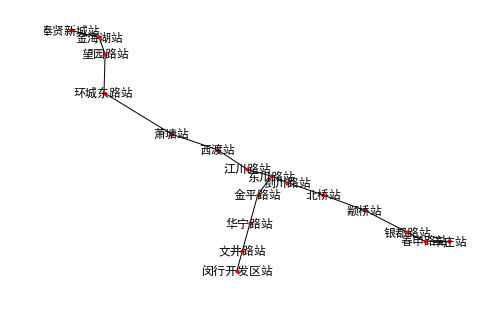

In [86]:
nx.draw(nx.Graph(create_subway_connection(subway_inf[4]['上海地铁5号线'])),station_location, with_labels=True, node_size=10)

In [87]:
station_location_from_official ={}

In [88]:
with open('staion_inf.js', 'r',encoding='utf-8') as f: 
    ss = 'start'
    while(ss != ''):
        ss = f.readline()
        if ss.startswith('﻿var gis ='): 
            ss.replace('var gis = ', '')
            gis = eval(ss.replace('﻿var gis =', ''))
        if ss.startswith('var stations ='):      
            station_tag= eval(ss.replace('var stations =',''))
        

In [89]:
len(gis)

313

In [90]:
len(station_tag)

423

In [91]:
station_test = {'莘庄站': (31.116917, 121.392129),
 '外环路站': (31.126655, 121.399619),
 '莲花路站': (31.136734, 121.409334),
 '锦江乐园站': (31.148347, 121.420556),
 '上海南站站': (31.160424, 121.436696)}

stations_connection_test ={
    '莘庄站':['外环路站'],
    '外环路站':['莘庄站','莲花路站'],
    '莲花路站':['外环路站','锦江乐园站'],
    '上海南站站':['锦江乐园站']    
}

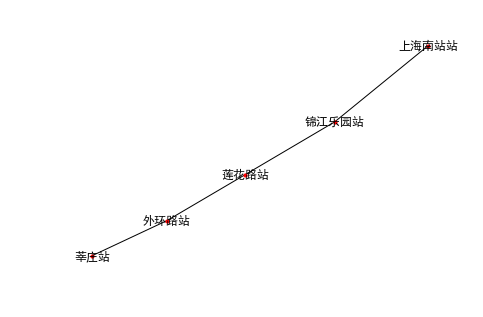

In [92]:
nx.draw(nx.Graph(stations_connection_test),station_test,with_labels=True, node_size=10)

In [93]:
#stations_connection_all

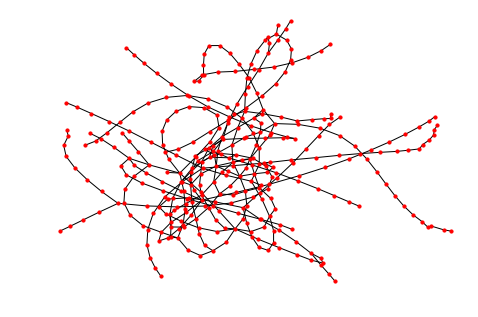

In [94]:
nx.draw(nx.Graph(stations_connection_all),with_labels=False, node_size=10)

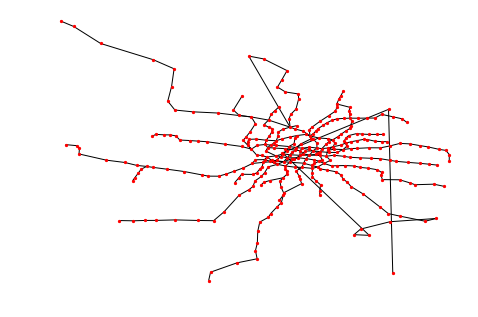

In [95]:
nx.draw(nx.Graph(stations_connection_all),station_location,with_labels=False, node_size=5)

In [96]:
subway_inf[14]

{'上海地铁17号线': ['虹桥火车站站',
  '诸光路站',
  '蟠龙路站',
  '徐盈路站',
  '徐泾北城站',
  '嘉松中路站',
  '赵巷站',
  '汇金路站',
  '青浦新城站',
  '漕盈路站',
  '淀山湖大道站',
  '朱家角站',
  '东方绿舟站']}

In [97]:
#create_subway_connection(subway_inf[4]['上海地铁5号线'])

In [98]:
stations_connection_all["虹桥火车站站"]

['虹桥2号航站楼站', '徐泾东站', '诸光路站']

#### Build Search agent

In [99]:
def search(start, destination, connection_grpah, sort_candidate, by_the_way =[]):
    #默认算法一定要是广度优先，这样sort_candidate的策略才能有效发挥，默认是深度优先的话容易一条路走到黑，
    #排序算法发挥不了作用，反而起到反效果
    pathes = [[start]]  #每走一步都添加一个新的路径
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)   #获取当前要访问的路径, 控制深度 广度path = pathes.pop()则变成深度优先 
        froninter = path[-1]   #获取当前达到的节点
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]  #获取当前节点的所有连接节点
        #print('当前访问节点：', froninter)
       # print('当前节点邻接节点: ', successors)
        for city in successors:
            if city in path: continue  # eliminate loop 防止环形,也防止重复访问,和city in visitied有同样效果
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        if by_the_way==[]:          
            pathes = sort_candidate(pathes) # 搜索策略控制
        else:
            pathes = sort_candidate(pathes, by_the_way)
        #print('sorted', pathes , '\n')

In [100]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [101]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [102]:
def pretty_print(station):
    print(len(station))
    print('🚗->'.join(station))

In [103]:
pretty_print(search('环城东路站', '人民广场站', stations_connection_all, sort_candidate=transfer_stations_first))

23
环城东路站🚗->萧塘站🚗->西渡站🚗->江川路站🚗->东川路站🚗->剑川路站🚗->北桥站🚗->颛桥站🚗->银都路站🚗->春申路站🚗->莘庄站🚗->外环路站🚗->莲花路站🚗->锦江乐园站🚗->上海南站站🚗->漕宝路站🚗->上海体育馆站🚗->徐家汇站🚗->衡山路站🚗->常熟路站🚗->陕西南路站🚗->黄陂南路站🚗->人民广场站


In [104]:
ss = search('环城东路站', '人民广场站', stations_connection_all, sort_candidate=transfer_stations_first)
ss

['环城东路站',
 '萧塘站',
 '西渡站',
 '江川路站',
 '东川路站',
 '剑川路站',
 '北桥站',
 '颛桥站',
 '银都路站',
 '春申路站',
 '莘庄站',
 '外环路站',
 '莲花路站',
 '锦江乐园站',
 '上海南站站',
 '漕宝路站',
 '上海体育馆站',
 '徐家汇站',
 '衡山路站',
 '常熟路站',
 '陕西南路站',
 '黄陂南路站',
 '人民广场站']

# （Optional）Create different policies for transfer system.


In [105]:
def Sortest_Path_first(pathes):
    return sorted(pathes, key=len)

In [106]:
#计算换乘信息
def tansfer_calcu(path):
    transfer = []
    previous = None #上一个站的标识
    pre_line = None
    current_line = None  #当前地铁号
    pre_station  = None
    current_flag = -1
    for _a, station in enumerate(path):
        if previous:
            current_line = [x for x in previous if x in stations_tag[station]][0] #获取两站标识的交集
           # print(current_line)
            if current_line!= pre_line:
                transfer.append([current_line,[pre_station]])
                current_flag += 1
                pre_line = current_line
            transfer[current_flag][1]  +=  [station]          
            
        previous = stations_tag[station]
        pre_station = station
        
    return transfer 

In [107]:
nn = ['22',[]]

In [108]:
stations_tag['上海体育场站']

['上海地铁4号线']

In [109]:
def Minimum_Transfer_Priority(pathes):  
    '''1. 该算法可能会使得最小次数换乘次数与实际不符，
    因为最后一个站如果成功会直接搜索函数会直接返回,
    如果最后这个站换乘了，那么导致换乘次数+1,如何解决该问题？
    2. 该算法在一定程度上变成来深度优先算法！一条道走到黑，所以
    换乘数量少，导致实际效果并不理想'''
    if len(pathes) <= 1: return pathes
    
    def tansfer_calcu(path):
        transfer = [] 
        previous = None #上一个站的标识
        previous_line = None #上一个地铁号
        current_line = None 
        for i in path:
            if previous:
                current_line = [x for x in previous if x in stations_tag[i]][0] #获取两站标识的交集                 
            if previous_line != current_line:
                transfer.append(current_line)
                previous_line = current_line
            previous = stations_tag[i]            
        return len(transfer)  
    
    return sorted(pathes, key=tansfer_calcu)

In [110]:
def tansfer_calcu_test(path):
    transfer = [] 
    previous = None #上一个站的标识
    previous_line = None #上一个地铁号
    current_line = None 
    for i in path:
        if previous:
            current_line = [x for x in previous if x in stations_tag[i]][0] #获取两站标识的交集                 
        if previous_line != current_line:
            transfer.append(current_line)
            previous_line = current_line
        previous = stations_tag[i]            
    return len(transfer)  

In [111]:
def pretty_print_improve(station):
    print(len(station))
    tansfer_info = tansfer_calcu(station)
    for i in tansfer_info:
        print(i[0][4:]+':','🚗->'.join(i[1]))

In [112]:
ss = search('环城东路站', '陆家浜路站', stations_connection_all, sort_candidate= Minimum_Transfer_Priority)

In [113]:
tansfer_calcu_test(ss)

4

In [114]:
ssss  = search('环城东路站', '人民广场站', stations_connection_all, sort_candidate=Minimum_Transfer_Priority)

In [115]:
pretty_print_improve(search('环城东路站', '人民广场站', stations_connection_all, sort_candidate=Minimum_Transfer_Priority))

23
5号线: 环城东路站🚗->萧塘站🚗->西渡站🚗->江川路站🚗->东川路站🚗->剑川路站🚗->北桥站🚗->颛桥站🚗->银都路站🚗->春申路站🚗->莘庄站
1号线: 莘庄站🚗->外环路站🚗->莲花路站🚗->锦江乐园站🚗->上海南站站🚗->漕宝路站🚗->上海体育馆站🚗->徐家汇站🚗->衡山路站🚗->常熟路站🚗->陕西南路站🚗->黄陂南路站🚗->人民广场站


In [116]:
#stations_tag

In [117]:
def Comprehensive_Priority(pathes):
    #取路径短的前两位 进行换乘次数排序
    new_pathes = Sortest_Path_first(pathes)
    if len(new_pathes)> 2:
        final_pathes = Minimum_Transfer_Priority(new_pathes[:2])+ new_pathes[2:]
    return final_pathes

In [118]:
def By_the_Way(pathes, by_the_way):
    '''有一定局限性，当遍历到目标节点，而另一条路线还为到达by_the_way的点
    时，会出现不同by_the_way的点的情况
    '''   
    if len(pathes) <= 1: return pathes
    
    fit_status = []
    for path in pathes:
        fit = [i for i in path if i in by_the_way]
        #print(fit)
        fit_status.append(len(fit))
    new_pathes_array = list(zip(pathes,fit_status))
    new_pathes_array = sorted(new_pathes_array, key=lambda x:x[1], reverse=True)
    new_pathes = list(list(zip(*new_pathes_array))[0])
    return new_pathes

In [119]:
ss = [1,3,4,5,5]
ss.reverse()

In [120]:
ss = search('环城东路站', '陆家浜路站', stations_connection_all, sort_candidate= Minimum_Transfer_Priority)

In [121]:
tt = search('环城东路站', '人民广场站', stations_connection_all, sort_candidate=By_the_Way,by_the_way=['上海体育场站'])

In [122]:
tt

['环城东路站',
 '萧塘站',
 '西渡站',
 '江川路站',
 '东川路站',
 '剑川路站',
 '北桥站',
 '颛桥站',
 '银都路站',
 '春申路站',
 '莘庄站',
 '外环路站',
 '莲花路站',
 '锦江乐园站',
 '上海南站站',
 '漕宝路站',
 '上海体育馆站',
 '上海体育场站',
 '东安路站',
 '大木桥路站',
 '嘉善路站',
 '陕西南路站',
 '黄陂南路站',
 '人民广场站']

In [123]:
tansfer_calcu(tt)

[['上海地铁5号线',
  ['环城东路站',
   '萧塘站',
   '西渡站',
   '江川路站',
   '东川路站',
   '剑川路站',
   '北桥站',
   '颛桥站',
   '银都路站',
   '春申路站',
   '莘庄站']],
 ['上海地铁1号线', ['莘庄站', '外环路站', '莲花路站', '锦江乐园站', '上海南站站', '漕宝路站', '上海体育馆站']],
 ['上海地铁4号线', ['上海体育馆站', '上海体育场站', '东安路站', '大木桥路站']],
 ['上海地铁12号线', ['大木桥路站', '嘉善路站', '陕西南路站']],
 ['上海地铁1号线', ['陕西南路站', '黄陂南路站', '人民广场站']]]

In [124]:
pretty_print_improve(search('环城东路站', '人民广场站', stations_connection_all, sort_candidate=By_the_Way,by_the_way=['东安路站','马当路站']))

27
5号线: 环城东路站🚗->萧塘站🚗->西渡站🚗->江川路站🚗->东川路站🚗->剑川路站🚗->北桥站🚗->颛桥站🚗->银都路站🚗->春申路站🚗->莘庄站
1号线: 莘庄站🚗->外环路站🚗->莲花路站🚗->锦江乐园站🚗->上海南站站🚗->漕宝路站🚗->上海体育馆站
4号线: 上海体育馆站🚗->上海体育场站🚗->东安路站🚗->大木桥路站
12号线: 大木桥路站🚗->嘉善路站
9号线: 嘉善路站🚗->打浦桥站🚗->马当路站🚗->陆家浜路站
8号线: 陆家浜路站🚗->老西门站🚗->大世界站🚗->人民广场站


In [125]:
pretty_print_improve(search('环城东路站', '人民广场站', stations_connection_all, sort_candidate=Sortest_Path_first))

23
5号线: 环城东路站🚗->萧塘站🚗->西渡站🚗->江川路站🚗->东川路站🚗->剑川路站🚗->北桥站🚗->颛桥站🚗->银都路站🚗->春申路站🚗->莘庄站
1号线: 莘庄站🚗->外环路站🚗->莲花路站🚗->锦江乐园站🚗->上海南站站🚗->漕宝路站🚗->上海体育馆站🚗->徐家汇站🚗->衡山路站🚗->常熟路站🚗->陕西南路站🚗->黄陂南路站🚗->人民广场站


以下情况原因分析,因为在徐家汇站的时候Sortest_Path_first换乘了,故Minimum_Transfer_Priority算法根据排序结果会选择新路线,但是

新路线走到**陕西南路站**时候进行排序的时候(此时1号线已经走到头走完了,现在是返回到原来的点)和 原来徐家汇站的那条路线处于同等优先级别, 但徐家汇站的那条路线已经被排到后面来,所以

继续沿着**陕西南路站**当走到**老西门**站时候往下走 ,还没来得及排序就找到了终点站,直接返回了。如何解决该问题？？

In [126]:
pretty_print_improve(search('环城东路站', '陆家浜路站', stations_connection_all, sort_candidate=Sortest_Path_first))

23
5号线: 环城东路站🚗->萧塘站🚗->西渡站🚗->江川路站🚗->东川路站🚗->剑川路站🚗->北桥站🚗->颛桥站🚗->银都路站🚗->春申路站🚗->莘庄站
1号线: 莘庄站🚗->外环路站🚗->莲花路站🚗->锦江乐园站🚗->上海南站站🚗->漕宝路站🚗->上海体育馆站🚗->徐家汇站
9号线: 徐家汇站🚗->肇嘉浜路站🚗->嘉善路站🚗->打浦桥站🚗->马当路站🚗->陆家浜路站


In [127]:
pretty_print_improve(search('环城东路站', '陆家浜路站', stations_connection_all, sort_candidate= Minimum_Transfer_Priority))

24
5号线: 环城东路站🚗->萧塘站🚗->西渡站🚗->江川路站🚗->东川路站🚗->剑川路站🚗->北桥站🚗->颛桥站🚗->银都路站🚗->春申路站🚗->莘庄站
1号线: 莘庄站🚗->外环路站🚗->莲花路站🚗->锦江乐园站🚗->上海南站站🚗->漕宝路站🚗->上海体育馆站🚗->徐家汇站🚗->衡山路站🚗->常熟路站🚗->陕西南路站
10号线: 陕西南路站🚗->新天地站🚗->老西门站
8号线: 老西门站🚗->陆家浜路站


In [ ]:
ss = list(zip([[22,33,44],[11,55],[77,88]],[4,5,6]))

In [ ]:
ss = [[1,2,3],[3,5,5],[4,4,4],[5,5,5]]


In [ ]:
sorted(ss, key = lambda x: x[2])

In [ ]:
list(zip(*ss))

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


Ans：路程最短优先和by_the_way策略实际效果还可以，最少换乘算法效果不理想，因为最少换乘算法实现是根据当前换乘数来排序，容易一条路走到黑，类似深度优先算法了,有待进一步优化

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)